In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import os
import math
from datetime import datetime
from datetime import timedelta
import plotly.express as px
import ast
import random


In [3]:
df= pd.read_csv('../input/netflix-tv-shows-and-movies/titles.csv')

# **explore the data**

In [4]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [5]:
df.columns


Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

**Unpack and repair the production_countries and genre column values which are currently arrays**

In [6]:
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    
    elif len(arr) == 1:
        return arr[0]
    
    else:
        return random.choice(arr)

In [7]:
df["production_countries"] = df["production_countries"].apply(repair_array_bound_categories)
df["genres"] = df["genres"].apply(repair_array_bound_categories)

In [8]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,drama,US,NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,fantasy,GB,NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,NaN,tt0070047,8.1,391942.0,95.337,7.7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5738 non-null   object 
 8   production_countries  5574 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

**let's check the duplicated**

In [10]:
df.duplicated().sum()


0

In [11]:
df.isnull().sum()


id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                    68
production_countries     232
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

**let's descover the type if it show or movise**

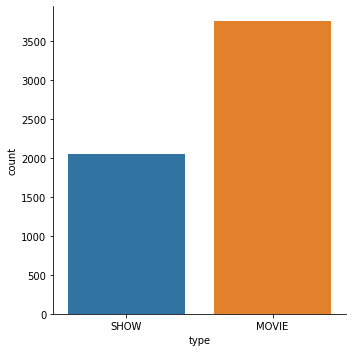

In [12]:
sns.catplot(x='type',kind='count',data=df)

**most of the type is movie**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'R'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'G'),
  Text(5, 0, 'PG-13'),
  Text(6, 0, 'TV-PG'),
  Text(7, 0, 'TV-Y'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'TV-Y7'),
  Text(10, 0, 'NC-17')])

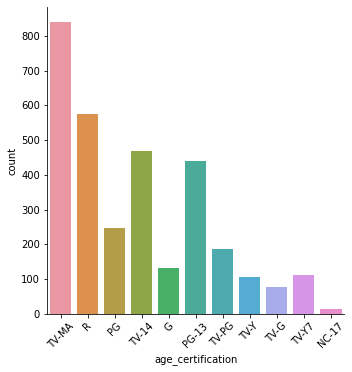

In [13]:
sns.catplot(x='age_certification',kind="count",data=df)
plt.xticks(rotation=45)


**the most of age certification is TV_MA**
* TV_MA:esigned to be viewed by adults and therefore may be unsuitable for children under 17

**and let's see the most genders**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'documentation'),
  Text(1, 0, 'drama'),
  Text(2, 0, 'fantasy'),
  Text(3, 0, 'comedy'),
  Text(4, 0, 'horror'),
  Text(5, 0, 'european'),
  Text(6, 0, 'crime'),
  Text(7, 0, 'music'),
  Text(8, 0, 'romance'),
  Text(9, 0, 'action'),
  Text(10, 0, 'family'),
  Text(11, 0, 'war'),
  Text(12, 0, 'thriller'),
  Text(13, 0, 'scifi'),
  Text(14, 0, 'animation'),
  Text(15, 0, 'reality'),
  Text(16, 0, 'sport'),
  Text(17, 0, 'history'),
  Text(18, 0, 'western')])

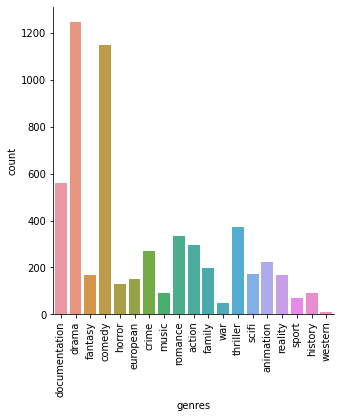

In [14]:
sns.catplot(x='genres', kind="count", data=df)
plt.xticks(rotation=90)


**drama is the most gender**

**we want to know the most production countries so let's count it**

In [15]:
shows_countries= df.production_countries.value_counts()
shows_countries = pd.DataFrame(shows_countries)



**we want to see the most production countries so i separated the most 15 countries**

In [16]:
shows_countries= shows_countries.head(15)
shows_countries



,production_countries
US,2127
IN,618
GB,291
JP,272
KR,213
ES,186
FR,178
CA,151
MX,106
DE,91


In [17]:

labels = ['US','IN','JP','GB','KR','ES','FR','CA','MX','BR','PH','TR','NG','DE','AU']
values = [1950, 605, 266, 219,210,159,124,103,95,86,80,79,67,65,62]

**let's show it in pie char**

In [18]:
fig = px.pie(df, values=values, names=labels, title='most production countries')
fig.show()

**as we can see the most production countrie is us by 46.8%**

**and now we want to see the release_year**

In [19]:
release_year_count= df.release_year.value_counts()

release_year_count = pd.DataFrame(release_year_count)

release_year_count


,release_year
2019,848
2020,805
2018,774
2021,758
2017,580
...,...
1974,1
1959,1
1962,1
1978,1


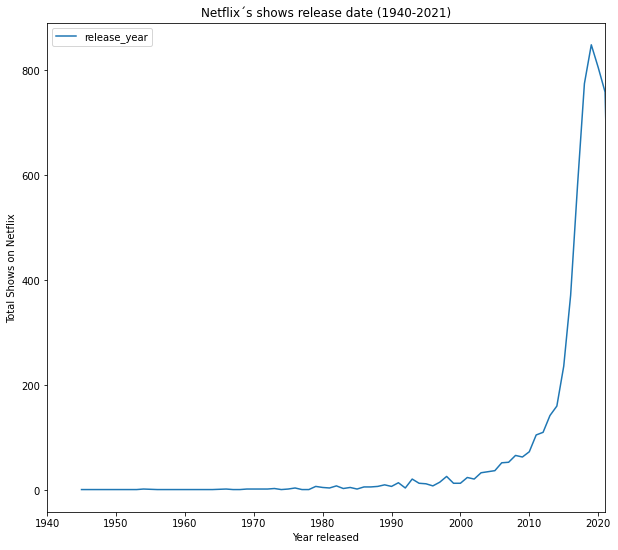

In [20]:
plt.figure(figsize=(10, 9))
sns.lineplot(data= release_year_count)
plt.title('Netflix´s shows release date (1940-2021)')
plt.xlim(1940, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()


**as we can see the most released from 2010 to 2021**

# **deeper analysis**

**i want to see the genres of content for each age_certification**

<AxesSubplot:xlabel='age_certification', ylabel='count'>

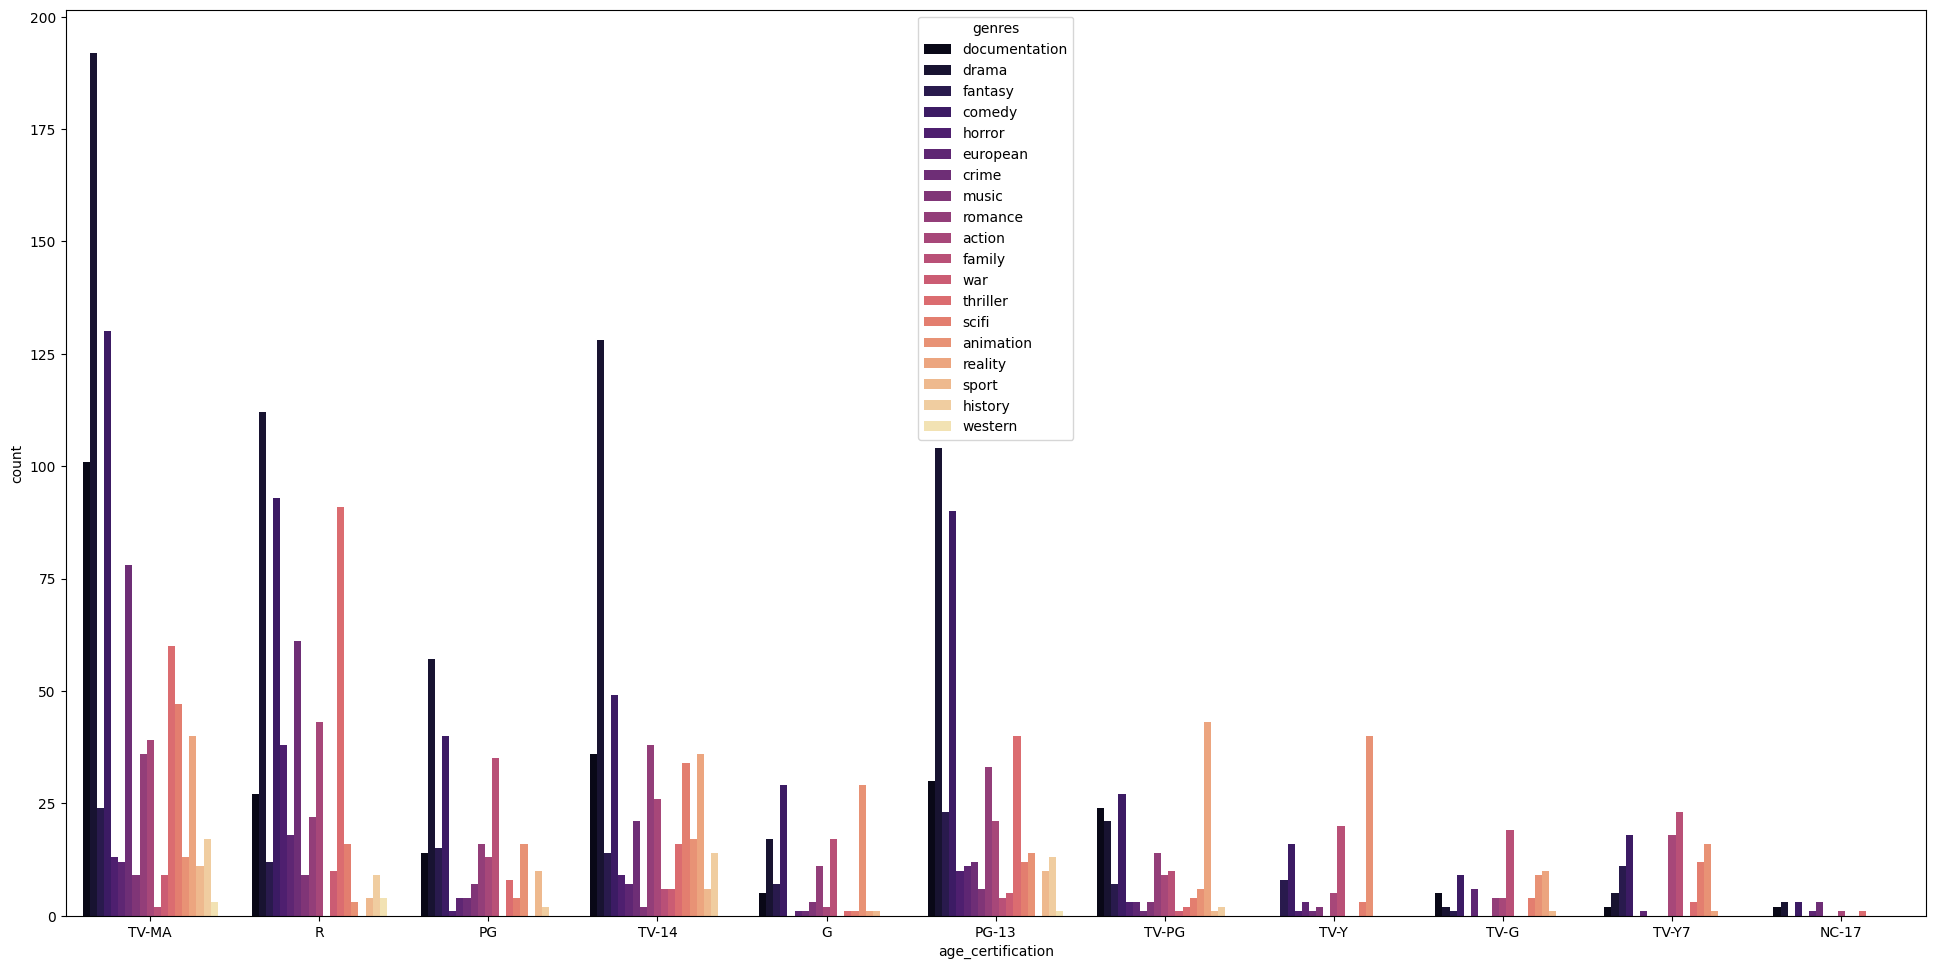

In [21]:
plt.figure(figsize=(24, 12), dpi=100)
sns.countplot(data=df, x="age_certification", hue="genres",palette = 'magma')


**Now let's see imdb_score and tmdb_score**

In [22]:
b= df.groupby('genres')[['imdb_score']].sum().reset_index()
b

,genres,imdb_score
0,action,1770.7
1,animation,1267.9
2,comedy,6693.5
3,crime,1714.9
4,documentation,3387.2
5,drama,7653.1
6,european,904.1
7,family,1175.8
8,fantasy,989.2
9,history,632.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'action'),
  Text(1, 0, 'animation'),
  Text(2, 0, 'comedy'),
  Text(3, 0, 'crime'),
  Text(4, 0, 'documentation'),
  Text(5, 0, 'drama'),
  Text(6, 0, 'european'),
  Text(7, 0, 'family'),
  Text(8, 0, 'fantasy'),
  Text(9, 0, 'history'),
  Text(10, 0, 'horror'),
  Text(11, 0, 'music'),
  Text(12, 0, 'reality'),
  Text(13, 0, 'romance'),
  Text(14, 0, 'scifi'),
  Text(15, 0, 'sport'),
  Text(16, 0, 'thriller'),
  Text(17, 0, 'war'),
  Text(18, 0, 'western')])

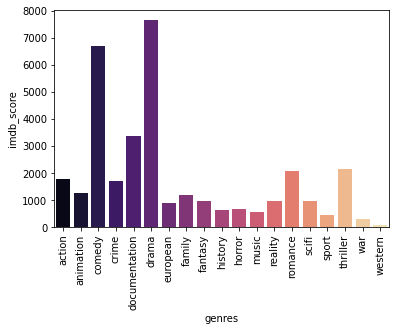

In [23]:
sns.barplot(x='genres',y='imdb_score',data=b,palette = 'magma')
plt.xticks(rotation=90)


**drama is the most imdb score**

**let's see tmdb_score**

In [24]:
b= df.groupby('genres')[['tmdb_score']].sum().reset_index()
b

,genres,tmdb_score
0,action,1881.4
1,animation,1379.4
2,comedy,7251.3
3,crime,1781.0
4,documentation,3701.3
5,drama,8028.4
6,european,960.9
7,family,1365.1
8,fantasy,1119.4
9,history,637.3


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'action'),
  Text(1, 0, 'animation'),
  Text(2, 0, 'comedy'),
  Text(3, 0, 'crime'),
  Text(4, 0, 'documentation'),
  Text(5, 0, 'drama'),
  Text(6, 0, 'european'),
  Text(7, 0, 'family'),
  Text(8, 0, 'fantasy'),
  Text(9, 0, 'history'),
  Text(10, 0, 'horror'),
  Text(11, 0, 'music'),
  Text(12, 0, 'reality'),
  Text(13, 0, 'romance'),
  Text(14, 0, 'scifi'),
  Text(15, 0, 'sport'),
  Text(16, 0, 'thriller'),
  Text(17, 0, 'war'),
  Text(18, 0, 'western')])

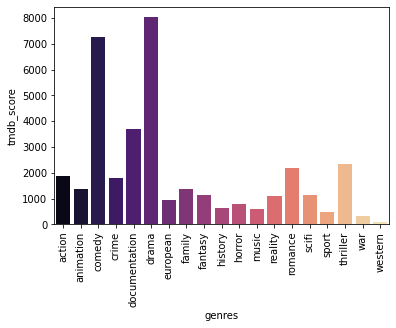

In [25]:
sns.barplot(x='genres',y='tmdb_score',data=b,palette = 'magma')
plt.xticks(rotation=90)

**drama else is the most tmdb score**

# **some statistics**

**i will divide the numbers to could know the correlation between them**

In [26]:
df_num = df[['release_year', 'runtime',   'seasons',  'imdb_score', 'imdb_votes', 'tmdb_popularity',  'tmdb_score']]


                 release_year   runtime   seasons  imdb_score  imdb_votes  \
release_year         1.000000 -0.211076 -0.505831   -0.102849   -0.196988   
runtime             -0.211076  1.000000 -0.132740   -0.159297    0.138610   
seasons             -0.505831 -0.132740  1.000000    0.097727    0.212645   
imdb_score          -0.102849 -0.159297  0.097727    1.000000    0.189954   
imdb_votes          -0.196988  0.138610  0.212645    0.189954    1.000000   
tmdb_popularity      0.025628 -0.027493  0.331362    0.023159    0.201813   
tmdb_score           0.049107 -0.285232  0.026796    0.587675    0.109720   

                 tmdb_popularity  tmdb_score  
release_year            0.025628    0.049107  
runtime                -0.027493   -0.285232  
seasons                 0.331362    0.026796  
imdb_score              0.023159    0.587675  
imdb_votes              0.201813    0.109720  
tmdb_popularity         1.000000    0.068405  
tmdb_score              0.068405    1.000000  


<AxesSubplot:>

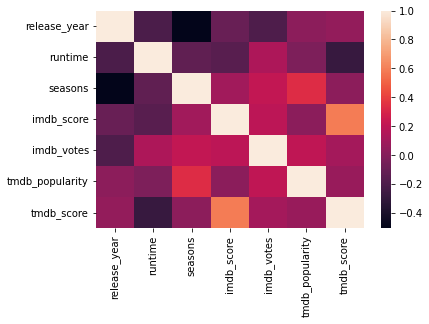

In [27]:
print(df_num.corr())
sns.heatmap(df_num.corr())